$\Large \frac{\int F_\nu \frac{1}{h \nu} S d\nu}{\int \frac{1}{h \nu} S d\nu}$

$F_\nu$ : Flux of model in $F_\nu$

h : planck constant in erg / s 

S : transmission curve

In [52]:
from spec_tools import Photometry
import numpy as np
import pandas as pd
import fsps
import matplotlib.pyplot as plt

h=6.6260755E-27 # planck constant erg s
c=3E18          # speed of light ang s^-1
atocm=1E-8    # unit to convert angstrom to cm
kb=1.38E-16	    # erg k-1

template_path = '../templates/'
phot_path = '../phot/'

sp = fsps.StellarPopulation(imf_type = 0, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(0.002/0.019), 
                        sfh = 4, tau = 0.6, dust_type = 1)

model_wave, model_flux = sp.get_spectrum(tage = 3.6, peraa = True)


In [19]:
SWV, TR = np.load(template_path + 'master_tmp.npy',allow_pickle=True)  # original senswv and trans
B = np.load(template_path + 'bottom_precalc.npy',allow_pickle=True) # transmission curve
DNU = np.load(template_path + 'dnu_precalc.npy',allow_pickle=True) # senswv in nu
ADJ = np.load(template_path + 'adj_precalc.npy',allow_pickle=True) # go from Fnu to Flam
MFWV = np.load(template_path + 'effwv_precalc.npy',allow_pickle=True)  # effwv

MDF = pd.read_pickle(phot_path + 'model_photometry_list.pkl')

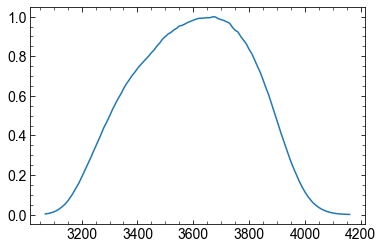

In [35]:
plt.plot(SWV[IDP], TR[IDP])

In [24]:
#227 
IDP = 0

P = Photometry(model_wave, model_flux, np.ones_like(model_flux),227)
P.Get_Sensitivity()

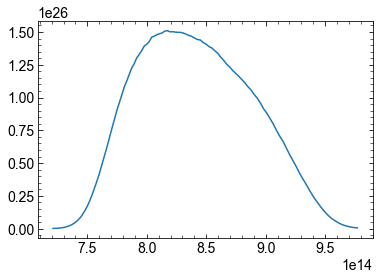

In [56]:
plt.plot(c/P.sens_wv, P.trans/h )

In [54]:
energy

array([1.54440337e+11, 1.54943400e+11, 1.55446463e+11, 1.55949526e+11,
       1.56452589e+11, 1.56955652e+11, 1.57458715e+11, 1.57961778e+11,
       1.58464841e+11, 1.58967904e+11, 1.59470967e+11, 1.59974030e+11,
       1.60477093e+11, 1.60980156e+11, 1.61483219e+11, 1.61986282e+11,
       1.62489345e+11, 1.62992408e+11, 1.63495471e+11, 1.63998534e+11,
       1.64501597e+11, 1.65004660e+11, 1.65507723e+11, 1.66010786e+11,
       1.66513849e+11, 1.67016912e+11, 1.67519975e+11, 1.68023038e+11,
       1.68526101e+11, 1.69029164e+11, 1.69532227e+11, 1.70035290e+11,
       1.70538353e+11, 1.71041416e+11, 1.71544479e+11, 1.72047542e+11,
       1.72550605e+11, 1.73053668e+11, 1.73556731e+11, 1.74059794e+11,
       1.74562857e+11, 1.75065919e+11, 1.75568982e+11, 1.76072045e+11,
       1.76575108e+11, 1.77078171e+11, 1.77581234e+11, 1.78084297e+11,
       1.78587360e+11, 1.79090423e+11, 1.79593486e+11, 1.80096549e+11,
       1.80599612e+11, 1.81102675e+11, 1.81605738e+11, 1.82108801e+11,
      

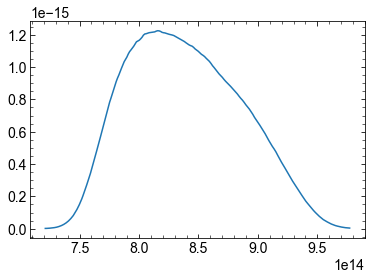

In [53]:
nu = c /  P.sens_wv
energy = 1 / (h * nu)

plt.plot(DNU[IDP], B[IDP])

In [42]:
B

array([[3.97456527e-18, 5.03469058e-18, 6.24260099e-18, ...,
        2.14811535e-18, 1.94299326e-18, 1.81168000e-18],
       [6.03888000e-17, 6.33487090e-17, 6.63154146e-17, ...,
        2.01907079e-17, 1.76339534e-17, 1.50722783e-17],
       [1.79682507e-18, 2.05820797e-18, 2.32018974e-18, ...,
        1.44106642e-17, 1.26626144e-17, 1.09112501e-17],
       ...,
       [1.34973560e-17, 2.02262893e-17, 2.69755227e-17, ...,
        2.02045492e-15, 1.41557576e-15, 8.09281017e-16],
       [3.84759540e-17, 4.16761648e-17, 4.48869844e-17, ...,
        6.86603671e-17, 5.00048110e-17, 3.13016855e-17],
       [2.27622079e-17, 2.27633097e-17, 2.27639374e-17, ...,
        4.55240636e-17, 4.41332743e-17, 4.27366200e-17]])